### Data Visualization of the Capture24 Dataset

Objectives: 
1. Understand Distribution of HAC Labels
2. Understand Accelerometer Data ( 3-axis)
3. Understand Mapping between Accelerometer Data and HAC - how is this labelled?

### Labels Insights
There are several types of labels that were used to categorize HAC


| Label System               |  Granularity | Core Idea                                                                                                      | Typical Usage                                   |
| -------------------------- | :----------: | -------------------------------------------------------------------------------------------------------------- | ----------------------------------------------- |
| **`WillettsSpecific2018`** |   **High**   | Fine-grained behavior classes (e.g. walking, cycling, driving, mixed activity, sedentary still, sleep)         | detailed behavior recognition                   |
| **`WillettsMET2018`**      |    **Low**   | Same data but mapped to **MET intensity bins** (<1.5, 1.5–3, 3–6, >6 METs)                                     | energy expenditure / caloric intensity modeling |
| **`DohertySpecific2018`**  | **Med-High** | Explicit posture + locomotion categories (sitting, lying, standing, walking, cycling, running, vehicle travel) | biomechanical activity classification           |
| **`Willetts2018`**         |  **Medium**  | Coarse Willetts grouping (sleep, sedentary, light, MVPA)                                                       | population health behavior grouping             |
| **`Doherty2018`**          |  **Medium**  | Coarse Doherty grouping (sedentary, household/light, locomotion, sleep)                                        | epidemiology-friendly summary labels            |
| **`Walmsley2020`**         |  **Medium**  | Rationalized “modern” cross-cohort set (sleep, sedentary, walking, cycling, mixed MVPA, vehicle)               | standardized public-health comparisons          |


The "annotation-label-dictionary' provides a mapping between each of the label methods. For example, Willetts2018: Mixed  maps to Walmsley2020: light, etc.


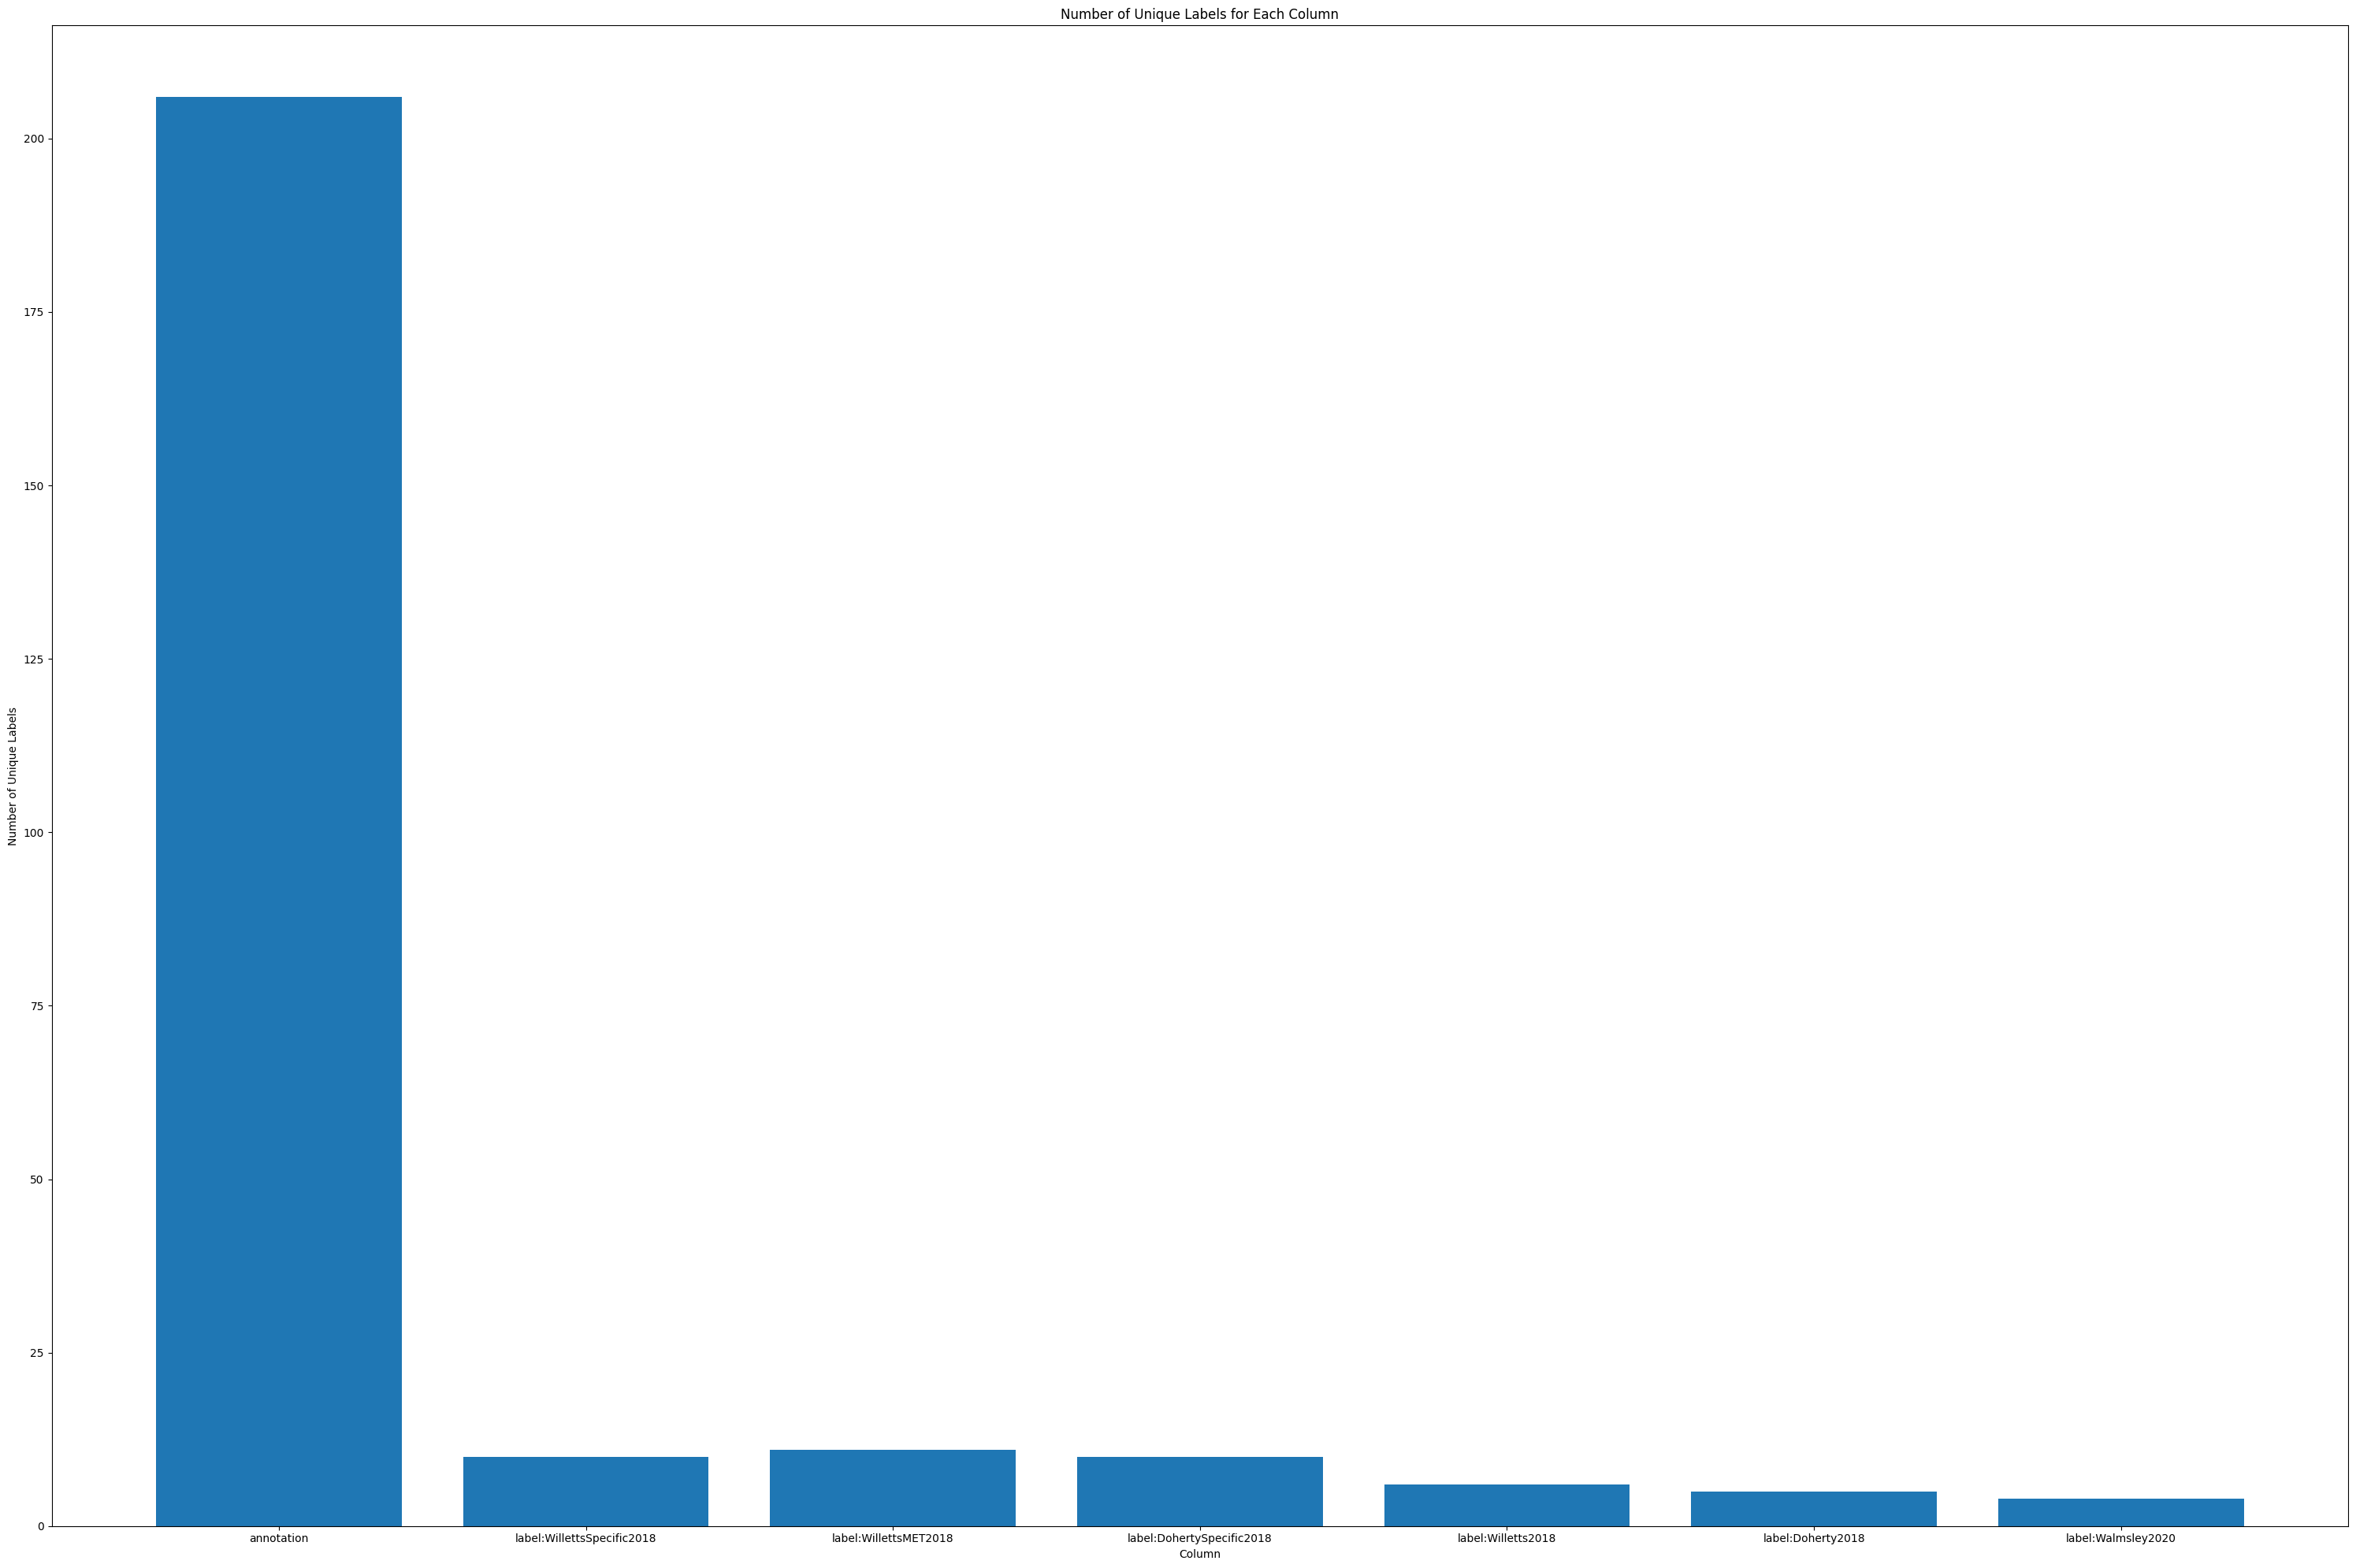

In [6]:
# Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

with open('capture24/data/capture24/annotation-label-dictionary.csv', 'r') as f:
    annotation_dict = pd.read_csv(f)

mapping = dict(zip(annotation_dict['annotation'], annotation_dict['label:Willetts2018']))

# Provide distribution of labels for each of these columsn
fig, axs = plt.subplots(figsize=(30, 20))

# simply plot the number of unique labels for each of these columns
axs.bar(annotation_dict.columns, annotation_dict.nunique())
axs.set_title('Number of Unique Labels for Each Column')
axs.set_xlabel('Column')
axs.set_ylabel('Number of Unique Labels')
plt.tight_layout()
plt.show()



In [3]:
import numpy as np
file_path = 'capture24/prepared_data_1024'
# Let's take a look at the prepared data
X_from_npy = np.load(f'{file_path}/X.npy')
print(X_from_npy[10])

# Let's take a look at the labels
Y_from_npy = np.load(f'{file_path}/Y_anno.npy', allow_pickle=True)
print(Y_from_npy[10])

Y_W2020 = np.load(f'{file_path}/Y_Walmsley2020.npy')
print(Y_W2020[10])

Y_Willetts2018 = np.load(f'{file_path}/Y_WillettsSpecific2018.npy')
print(Y_Willetts2018[10])

# Let's take a look at the time stamps
T_from_npy = np.load(f'{file_path}/T.npy')
print(T_from_npy[:10])

# Let's take a look at the patient ids
P_from_npy = np.load(f'{file_path}/P.npy')
# Process data to remove P and convert to int
P_from_npy = [int(i.split('P')[1]) for i in P_from_npy]

[[ 0.8251444  -0.2780502  -0.48983255]
 [ 0.8251444  -0.2780502  -0.48983255]
 [ 0.84065473 -0.2780502  -0.48983255]
 ...
 [ 0.8251444  -0.2780502  -0.48983255]
 [ 0.8251444  -0.2780502  -0.47412065]
 [ 0.8251444  -0.2780502  -0.48983255]]
7030 sleeping;MET 0.95
sleep
sleep
['2016-04-10T22:54:00.000000000' '2016-04-10T22:54:10.240000000'
 '2016-04-10T22:54:20.480000000' '2016-04-10T22:54:30.720000000'
 '2016-04-10T22:54:40.960000000' '2016-04-10T22:54:51.200000000'
 '2016-04-10T22:55:01.440000000' '2016-04-10T22:55:11.680000000'
 '2016-04-10T22:55:21.920000000' '2016-04-10T22:55:32.160000000']


### Visualization Plots
1. Show single example for each of the classes

['sleep' 'household-chores' 'walking' 'sitting' 'mixed-activity'
 'bicycling' 'standing' 'manual-work' 'sports' 'vehicle']


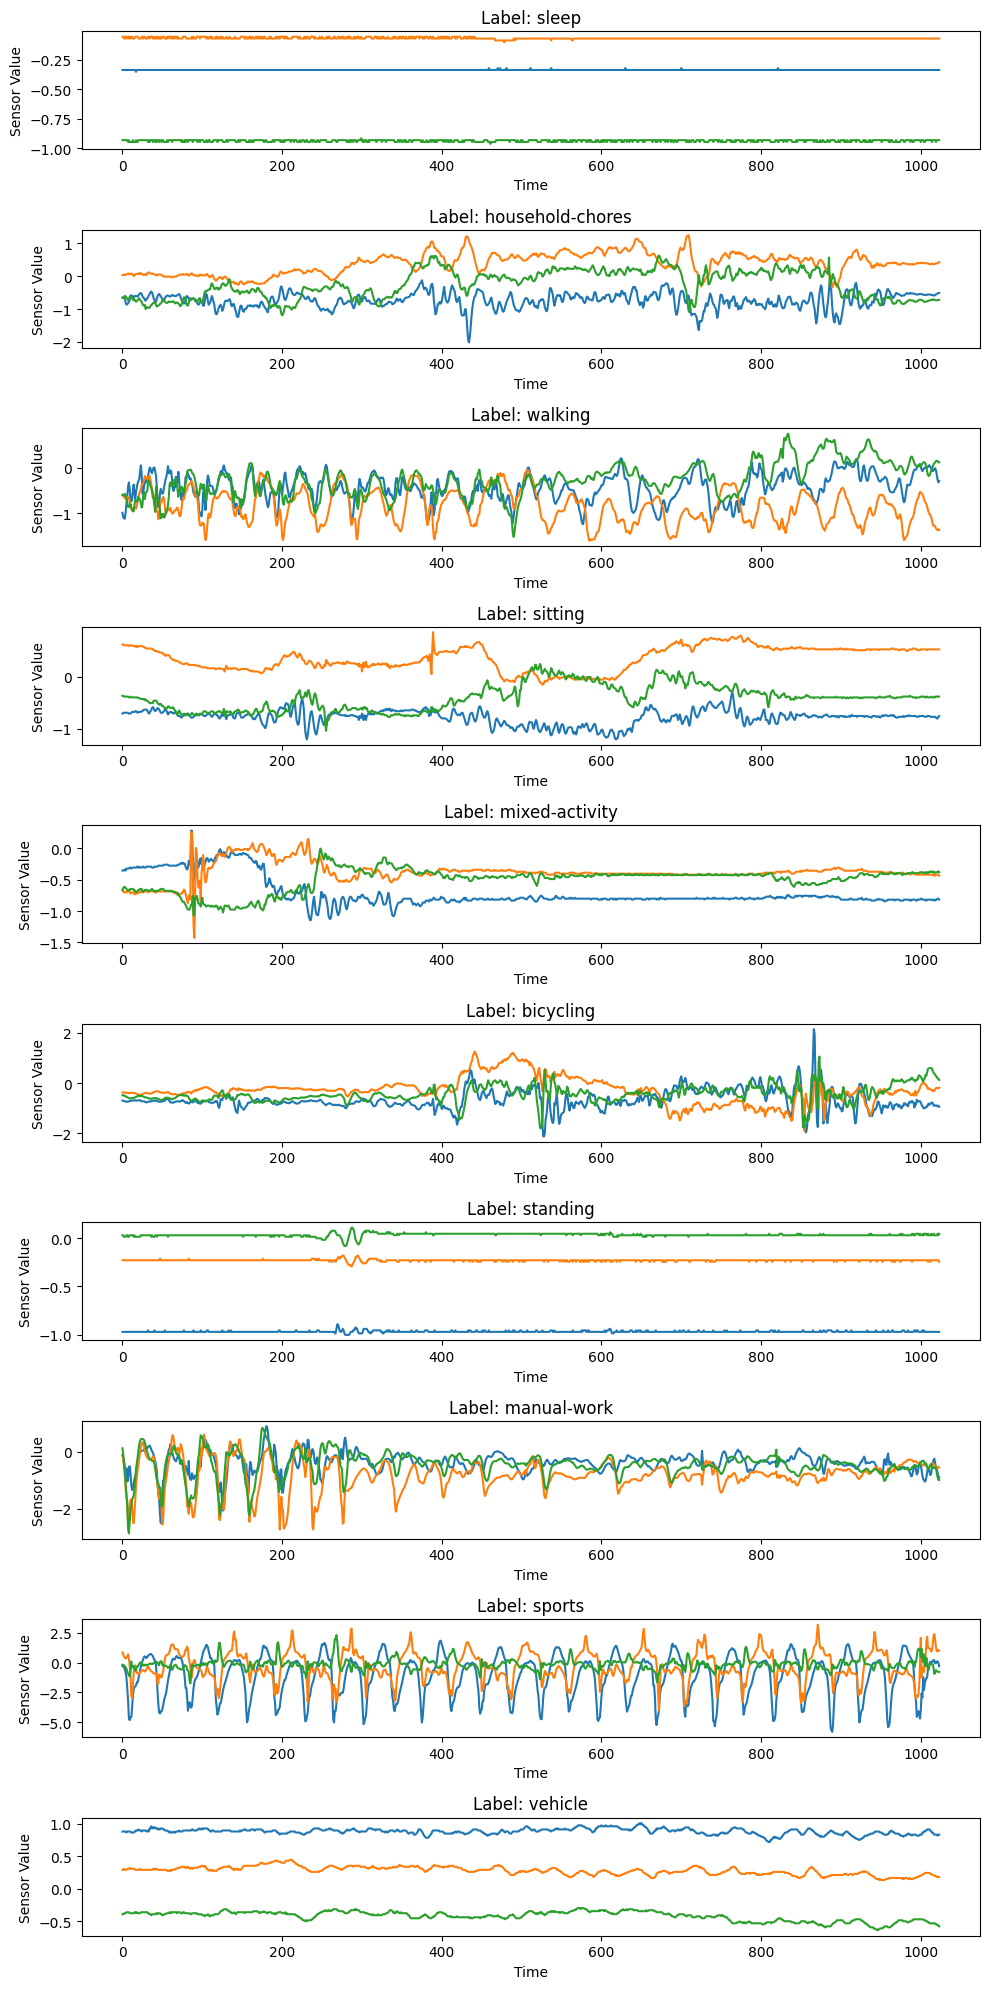

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
# Convert numpy array to pandas dataframe
Y_df = pd.DataFrame({"labels":Y_Willetts2018.reshape(-1)})
print(Y_df['labels'].unique())


unique_labels = Y_df['labels'].unique()
num_labels = len(unique_labels)

fig, axes = plt.subplots(num_labels, 1, figsize=(10, 2 * num_labels))
if num_labels == 1:
    axes = [axes]  # make iterable

for ax, label in zip(axes, unique_labels):
    idx = np.where(Y_df['labels'] == label)[0][0]
    ax.plot(X_from_npy[idx])
    ax.set_title(f"Label: {label}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Sensor Value")

plt.tight_layout()
plt.show()
